<a href="https://colab.research.google.com/github/Christina-26/Marvel-Level--2-Task/blob/main/Anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Anomaly detection**
Anomaly detection is the process of identifying these unusual patterns or behaviors in data. It is important because anomalies can indicate important events or problems, such as fraudulent activity, equipment failure, or security breaches.

# Anomaly Detection Algorithms

1. **Local Outlier Factor** (LOF) algorithm - This algorithm uses the local density of points in a dataset to identify anomalies. The basic idea is that, in most datasets, the density of points is relatively uniform, with only a few points having significantly lower or higher densities than the rest.

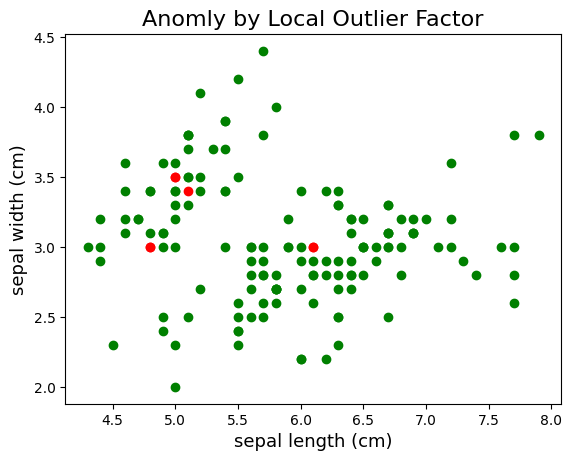

In [2]:
# Import the necessary modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import LocalOutlierFactor

# Load the datasets
df = load_iris(as_frame=True).frame
X = df[['sepal length (cm)','sepal width (cm)']]

# Define the model and set the number of neighbors
lof = LocalOutlierFactor(n_neighbors=5)

# Fit the model to the data
lof.fit(X)

# Calculate the outlier scores for each point
scores = lof.negative_outlier_factor_

# Identify the points with the highest outlier scores
outliers = np.argwhere(scores > np.percentile(scores, 95))

# Plot anomly
colors=['green','red']

for i in range(len(X)):
    if i not in outliers:
        plt.scatter(X.iloc[i,0], X.iloc[i,1], color=colors[0]) # Not anomly
    else:
        plt.scatter(X.iloc[i,0], X.iloc[i,1], color=colors[1]) # anomly
plt.xlabel('sepal length (cm)',fontsize=13)
plt.ylabel('sepal width (cm)',fontsize=13)
plt.title('Anomly by Local Outlier Factor',fontsize=16)
plt.show()

 2. **Isolation Forest algorithm** - This algorithm uses decision trees to identify anomalies, by isolating points that are difficult to reach in the decision tree. The basic idea is that, in most datasets, the majority of points can be reached in the decision tree with only a few splits. Anomalies, on the other hand, are typically isolated from the rest of the data, requiring many splits to reach them in the decision tree.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


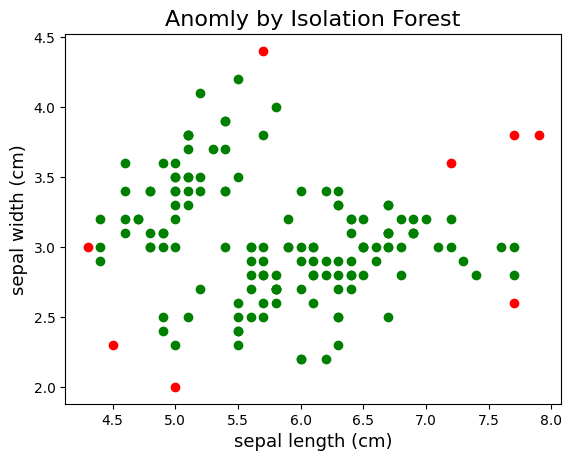

In [3]:
# Import the necessary modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import IsolationForest

df = load_iris(as_frame=True).frame
X = df[['sepal length (cm)','sepal width (cm)']]

# Define the model and set the contamination level
model = IsolationForest(contamination=0.05)

# Fit the model to the data
model.fit(X)

# Calculate the outlier scores for each point
scores = model.decision_function(X)

# Identify the points with the highest outlier scores
outliers = np.argwhere(scores < np.percentile(scores, 5))

# Plot anomly
colors=['green','red']

for i in range(len(X)):
	if i not in outliers:
		plt.scatter(X.iloc[i,0], X.iloc[i,1], color=colors[0]) # Not anomly
	else:
		plt.scatter(X.iloc[i,0], X.iloc[i,1], color=colors[1]) # anomly
plt.xlabel('sepal length (cm)',fontsize=13)
plt.ylabel('sepal width (cm)',fontsize=13)
plt.title('Anomly by Isolation Forest',fontsize=16)
plt.show()


3. **One-class Support Vector Machines** (SVMs) - are another popular approach to anomaly detection. This algorithm uses support vector machines to learn a decision boundary that separates the majority of the data from the anomalies. The One-class SVM algorithm uses this property to learn a decision boundary that separates the majority of the data from the anomalies, and uses this boundary to identify points that are likely to be anomalies.

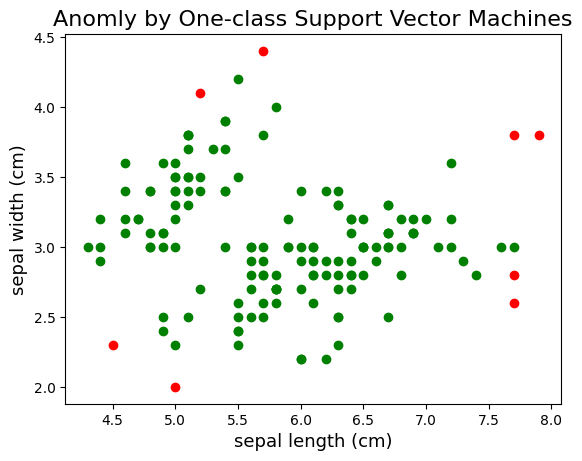

In [4]:
# Import the necessary modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import svm

df = load_iris(as_frame=True).frame
X = df[['sepal length (cm)','sepal width (cm)']]

# Define the model and set the nu parameter
model = svm.OneClassSVM(nu=0.05)

# Fit the model to the data
model.fit(X)

# Calculate the outlier scores for each point
scores = model.decision_function(X)

# Identify the points with the highest outlier scores
outliers = np.argwhere(scores < np.percentile(scores, 5))

# Plot anomly
colors=['green','red']

for i in range(len(X)):
	if i not in outliers:
		plt.scatter(X.iloc[i,0], X.iloc[i,1], color=colors[0]) # Not anomly
	else:
		plt.scatter(X.iloc[i,0], X.iloc[i,1], color=colors[1]) # anomly
plt.xlabel('sepal length (cm)',fontsize=13)
plt.ylabel('sepal width (cm)',fontsize=13)
plt.title('Anomly by One-class Support Vector Machines',fontsize=16)
plt.show()


4. **Elliptic Envelope algorithm** - is another approach to anomaly detection that assumes that the data is normally distributed. This algorithm fits an ellipse around the data, and identifies points that fall outside of the ellipse as anomalies. The basic idea is that, in a normally distributed dataset, most of the points will fall within the ellipse, while anomalies will fall outside of it. The Elliptic Envelope algorithm uses this property to identify anomalies by fitting an ellipse around the data and identifying points that fall outside of it.

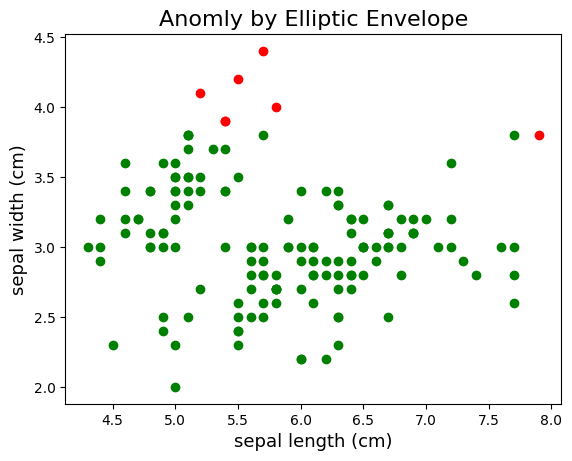

In [5]:
# Import the necessary modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.covariance import EllipticEnvelope

df = load_iris(as_frame=True).frame
X = df[['sepal length (cm)','sepal width (cm)']]

# Define the model and set the contamination level
model = EllipticEnvelope(contamination=0.05)

# Fit the model to the data
model.fit(X)

# Calculate the outlier scores for each point
scores = model.decision_function(X)

# Identify the points with the highest outlier scores
outliers = np.argwhere(scores < np.percentile(scores, 5))

# Plot anomly
colors=['green','red']

for i in range(len(X)):
	if i not in outliers:
		plt.scatter(X.iloc[i,0], X.iloc[i,1], color=colors[0]) # Not anomly
	else:
		plt.scatter(X.iloc[i,0], X.iloc[i,1], color=colors[1]) # anomly
plt.xlabel('sepal length (cm)',fontsize=13)
plt.ylabel('sepal width (cm)',fontsize=13)
plt.title('Anomly by Elliptic Envelope',fontsize=16)
plt.show()
